In [39]:
import argparse
import csv

import cv2
import dlib
import numpy as np
from imutils import face_utils
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import numpy as np
import math

In [14]:
predictor = dlib.shape_predictor('../../data/shape_predictor_68_face_landmarks.dat')
y_features = [];
x_features = [];
f = open('../../data/train.csv', 'r');
i = 0;
reader = csv.DictReader(f);
for row in reader:
    y_features.append(int(row['Emotion']));
    face = np.array([int(intensity) for intensity in row['Pixels'].split(' ')], np.uint8);
    image = np.reshape(face, (48,48));            
    shape = predictor(image, dlib.rectangle(top=0, left=0, bottom=48, right=48))
    shape = face_utils.shape_to_np(shape)

    height = dict();
    width = dict();

    # loop over the face parts individually
    for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
        (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))                
        width[name] = w;
        height[name] = h;

    #print width,'\n', height;
    x_features.append(np.array([width[mLEFT_EYEBROW], height[mLEFT_EYEBROW] , width[mRIGHT_EYEBROW], height[mRIGHT_EYEBROW], 
                                 width[mLEFT_EYE], height[mLEFT_EYE], width[mRIGHT_EYE], height[mRIGHT_EYE],
                                 width[mMOUTH], height[mMOUTH]]));

# print type(x_features)
# print len(x_features[0])

x_features = np.array(x_features);
y_features = np.array(y_features);  


shuff = np.arange(x_features.shape[0])

n = len(shuff);
trainingSamples = n*7/10;    

np.random.shuffle(shuff)
x_train = x_features[shuff[:trainingSamples],:]
y_train = y_features[shuff[:trainingSamples]]

x_valid = x_features[shuff[trainingSamples:],:]
y_valid = y_features[shuff[trainingSamples:]]

f.close()

In [15]:
mLEFT_EYE = 'left_eye'
mLEFT_EYEBROW = 'left_eyebrow'
mRIGHT_EYE = 'right_eye'
mMOUTH = 'mouth'
mRIGHT_EYEBROW = 'right_eyebrow'


imageData = Images("../../data/train.csv")



In [16]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', n_jobs=-1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_valid)
validationAccuracy = accuracy_score(y_valid,prediction)



In [21]:
print validationAccuracy
print knn.score(x_valid,y_valid)#,prediction)


0.571770334928
0.571770334928


In [18]:
len(y_valid)

1254

In [19]:
len(prediction)

1254

In [28]:
acc = []
for n in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto', n_jobs=-1)
    knn.fit(x_train,y_train)
    acc.append(knn.score(x_valid,y_valid))
    
#     prediction = knn.predict(x_valid)
#     validationAccuracy = accuracy_score(y_valid,prediction)

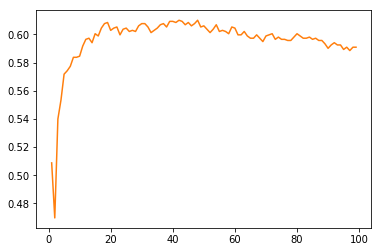

In [32]:
plt.plot(range(1,100),acc)
# plt.xlabel('NUmber of nearest neighbours')
# plt.ylabel('Accuracy')
# plt.title('Training examples vs accuracy')
# plt.legend()
# plt.savefig('kVsAccurracyNewLegend.pdf')
plt.show()


In [34]:
acc = np.array(acc)
np.where(acc==acc.max())

(array([41, 47]),)

In [44]:
fgh = np.zeros(5)
fgh[2] = 23
print fgh[2]

23.0


In [54]:
clf.cv_results_['params'][72]['n_neighbors']

74

In [58]:
tunedAccuracy = np.zeros(50)
tuned_parameters = {'n_neighbors': range(2,50)}

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)

clf.fit(x_train, y_train);

print("Best parameters :")
print()
print(clf.best_params_)
print()
print("Grid scores:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
i = 2
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    tunedAccuracy[i] = mean
    i += 1
    #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()        

Best parameters :
()
{'n_neighbors': 41}
()
Grid scores:
()
()


In [ ]:
np.random.shuffle(shuff)
x_train = x_features[shuff[:trainingSamples],:]
y_train = y_features[shuff[:trainingSamples]]

x_valid = x_features[shuff[trainingSamples:],:]
y_valid = y_features[shuff[trainingSamples:]]

In [72]:
tunedAccuracy[43]


60.531354715174722

In [67]:
tunedAccuracy[0]

array([ 45.83532791,  52.05840115,  54.35615127,  55.36141695,
        55.86404978,  56.91718526,  56.82144567,  57.92245093,
        58.42508377,  58.90378171,  58.71230254,  58.56869315,
        59.16706558,  59.43034945,  59.59789373,  59.64576352,
        59.8372427 ,  59.95691719,  60.07659167,  59.95691719,
        60.10052657,  60.14839636,  60.38774533,  60.14839636,
        60.6749641 ,  60.41168023,  60.38774533,  60.07659167,
        60.48348492,  60.45955002,  60.36381044,  60.41168023,
        60.6270943 ,  60.60315941,  60.69889899,  60.41168023,
        60.29200574,  60.02872188,  60.41168023,  60.77070369,
        60.41168023,  60.69889899,  60.60315941,  60.53135472,
        60.48348492,  60.36381044,  60.24413595,  60.10052657])

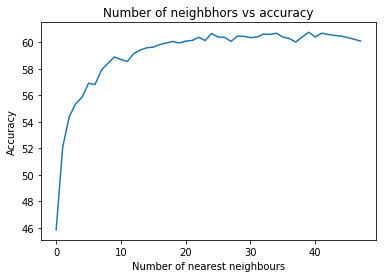

In [73]:
%matplotlib inline
plt.plot(range(len(tunedAccuracy)),tunedAccuracy)
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy')
plt.title('Number of neighbhors vs accuracy')
plt.savefig('knn.jpg')